<a href="https://colab.research.google.com/github/dangdang2222/DL_Computer_Vision/blob/main/pascal_voc_dataset.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!mkdir ./data
!wget http://host.robots.ox.ac.uk/pascal/VOC/voc2012/VOCtrainval_11-May-2012.tar
!tar -xvf VOCtrainval_11-May-2012.tar -C /content/data

스트리밍 출력 내용이 길어서 마지막 5000줄이 삭제되었습니다.
VOCdevkit/VOC2012/SegmentationClass/2008_001874.png
VOCdevkit/VOC2012/SegmentationClass/2008_001876.png
VOCdevkit/VOC2012/SegmentationClass/2008_001882.png
VOCdevkit/VOC2012/SegmentationClass/2008_001885.png
VOCdevkit/VOC2012/SegmentationClass/2008_001895.png
VOCdevkit/VOC2012/SegmentationClass/2008_001896.png
VOCdevkit/VOC2012/SegmentationClass/2008_001926.png
VOCdevkit/VOC2012/SegmentationClass/2008_001966.png
VOCdevkit/VOC2012/SegmentationClass/2008_001971.png
VOCdevkit/VOC2012/SegmentationClass/2008_001992.png
VOCdevkit/VOC2012/SegmentationClass/2008_001997.png
VOCdevkit/VOC2012/SegmentationClass/2008_002032.png
VOCdevkit/VOC2012/SegmentationClass/2008_002043.png
VOCdevkit/VOC2012/SegmentationClass/2008_002064.png
VOCdevkit/VOC2012/SegmentationClass/2008_002066.png
VOCdevkit/VOC2012/SegmentationClass/2008_002067.png
VOCdevkit/VOC2012/SegmentationClass/2008_002073.png
VOCdevkit/VOC2012/SegmentationClass/2008_002079.png
VOCdevkit/VOC2012/Segmentati

In [2]:
!ls /content/data/VOCdevkit/VOC2012
!ls /content/data/VOCdevkit/VOC2012/JPEGImages | head -n 5

Annotations  ImageSets	JPEGImages  SegmentationClass  SegmentationObject
2007_000027.jpg
2007_000032.jpg
2007_000033.jpg
2007_000039.jpg
2007_000042.jpg


image shape : (281, 500, 3)


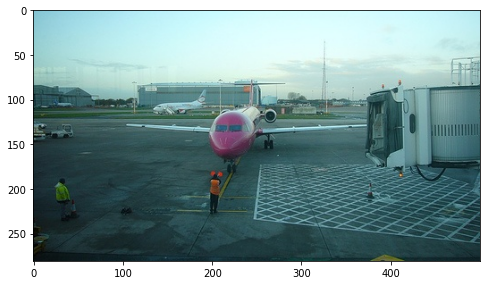

In [5]:
import cv2
import matplotlib.pyplot as plt
import os
%matplotlib inline

default_dir = '/content/data'
img = cv2.imread(os.path.join(default_dir,'VOCdevkit/VOC2012/JPEGImages/2007_000032.jpg'))
img_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
print('image shape :',img_rgb.shape)

plt.figure(figsize=(8,8))
plt.imshow(img_rgb)
plt.show()

In [6]:
!cat /content/data/VOCdevkit/VOC2012/Annotations/2007_000032.xml

<annotation>
	<folder>VOC2012</folder>
	<filename>2007_000032.jpg</filename>
	<source>
		<database>The VOC2007 Database</database>
		<annotation>PASCAL VOC2007</annotation>
		<image>flickr</image>
	</source>
	<size>
		<width>500</width>
		<height>281</height>
		<depth>3</depth>
	</size>
	<segmented>1</segmented>
	<object>
		<name>aeroplane</name>
		<pose>Frontal</pose>
		<truncated>0</truncated>
		<difficult>0</difficult>
		<bndbox>
			<xmin>104</xmin>
			<ymin>78</ymin>
			<xmax>375</xmax>
			<ymax>183</ymax>
		</bndbox>
	</object>
	<object>
		<name>aeroplane</name>
		<pose>Left</pose>
		<truncated>0</truncated>
		<difficult>0</difficult>
		<bndbox>
			<xmin>133</xmin>
			<ymin>88</ymin>
			<xmax>197</xmax>
			<ymax>123</ymax>
		</bndbox>
	</object>
	<object>
		<name>person</name>
		<pose>Rear</pose>
		<truncated>0</truncated>
		<difficult>0</difficult>
		<bndbox>
			<xmin>195</xmin>
			<ymin>180</ymin>
			<xmax>213</xmax>
			<ymax>229</ymax>
		</bndbox>
	</object>
	<object>
		<name>p

img shape: (281, 500, 3)


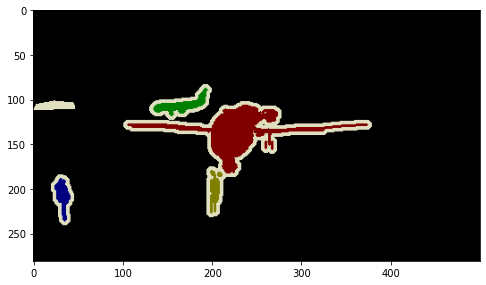

In [7]:
img = cv2.imread(os.path.join(default_dir, 'VOCdevkit/VOC2012/SegmentationObject/2007_000032.png'))
img_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
print('img shape:',img_rgb.shape)

plt.figure(figsize=(8,8))
plt.imshow(img_rgb)
plt.show()

In [8]:
import os
import random

VOC_ROOT_DIR  = "/content/data/VOCdevkit/VOC2012/"
ANNO_DIR = os.path.join(VOC_ROOT_DIR,"Annotations")
IMAGE_DIR = os.path.join(VOC_ROOT_DIR,"JPEGImages")

xml_files = os.listdir(ANNO_DIR)
print(xml_files[:5])
print(len(xml_files))



['2009_001696.xml', '2008_006410.xml', '2012_000532.xml', '2008_004838.xml', '2011_000566.xml']
17125


In [9]:
import os
import xml.etree.ElementTree as ET

xml_file = os.path.join(ANNO_DIR,'2007_000032.xml')

tree = ET.parse(xml_file)
root = tree.getroot()

image_name = root.find('filename').text
full_image_name = os.path.join(IMAGE_DIR, image_name)

image_size = root.find('size')
image_width = int(image_size.find('width').text)
image_height = int(image_size.find('height').text)

object_list = []
for obj in root.findall('object'):
  xmlbox = obj.find('bndbox')
  x1 = int(xmlbox.find('xmin').text)
  y1 = int(xmlbox.find('ymin').text)
  x2 = int(xmlbox.find('xmax').text)
  y2 = int(xmlbox.find('ymax').text)

  bndbox_pos = (x1,y1,x2,y2)
  class_name = obj.find('name').text
  object_dict = {'class_name:':class_name, 'bndbox_pos':bndbox_pos}
  object_list.append(object_dict)

print('full_image_name:',full_image_name,'\n','image_size:',(image_width, image_height))

for object in object_list:
  print(object)

full_image_name: /content/data/VOCdevkit/VOC2012/JPEGImages/2007_000032.jpg 
 image_size: (500, 281)
{'class_name:': 'aeroplane', 'bndbox_pos': (104, 78, 375, 183)}
{'class_name:': 'aeroplane', 'bndbox_pos': (133, 88, 197, 123)}
{'class_name:': 'person', 'bndbox_pos': (195, 180, 213, 229)}
{'class_name:': 'person', 'bndbox_pos': (26, 189, 44, 238)}


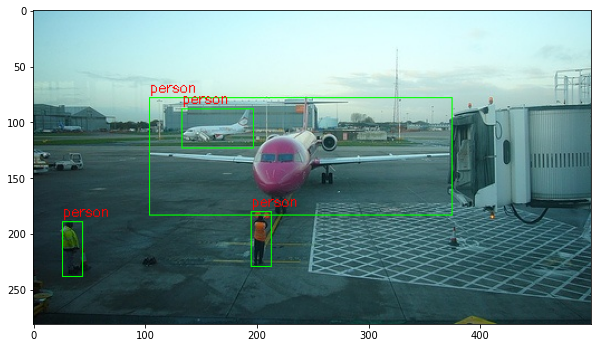

In [12]:
import cv2
import os
import xml.etree.ElementTree as ET

xml_file = os.path.join(ANNO_DIR,'2007_000032.xml')

tree = ET.parse(xml_file)
root = tree.getroot()

image_name = root.find('filename').text
full_image_name = os.path.join(IMAGE_DIR,image_name)

img = cv2.imread(full_image_name)
draw_img = img.copy()

green_color = (0,255,0)
red_color = (0,0,255)

object_list = []
for obj in root.findall('object'):
  xmlbox = obj.find('bndbox')

  left = int(xmlbox.find('xmin').text)
  top = int(xmlbox.find('ymin').text)
  right = int(xmlbox.find('xmax').text)
  bottom = int(xmlbox.find('ymax').text)

  class_name_obj = obj.find('name').text

  cv2.rectangle(draw_img, (left,top),(right,bottom),color=green_color,thickness=1)
  cv2.putText(draw_img, class_name, (left, top-5),cv2.FONT_HERSHEY_SIMPLEX,0.4, red_color, thickness=1)

img_rgb = cv2.cvtColor(draw_img, cv2.COLOR_BGR2RGB)
plt.figure(figsize=(10,10))
plt.imshow(img_rgb)